# Data Exploartion and Data Prepration

In [70]:
import os
import datetime
import pandas as pd
import numpy as np
import calendar
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import re
%matplotlib inline

In [71]:
# if os.getcwd().split("/")[-1] != 'intern-take-home-assessment':
#     os.chdir("./code/3m-internship/intern-take-home-assessment")

## Exploring Locations Data

In [72]:
locations_df = pd.read_csv("./raw-data/location_data.csv")
locations_df.head()

,location_id,population,elevation
0,1,18428,375
1,2,32926,274
2,3,74138,505
3,4,14255,360
4,5,12686,386


Location number 10 is much more populated than other locations. Elevations are closer to eachotehr.

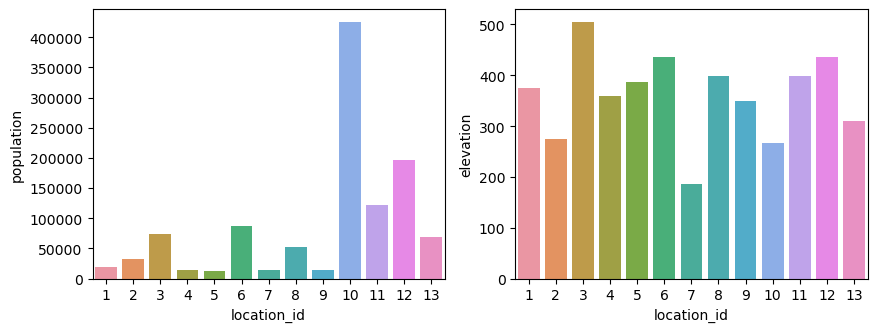

In [111]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
f, axes = plt.subplots(1, 2)

sns.barplot(locations_df, x='location_id', y='population', ax=axes[0])
sns.barplot(locations_df, x='location_id', y='elevation', ax=axes[1])
plt.savefig('./assets/locations.png', bbox_inches='tight')
plt.show()

## Exploring Weather Data

In [74]:
weather_df = pd.read_csv("./raw-data/weather_data.csv", parse_dates=['date'])
# Change the cloudy and perceptiation variables to integeres. This helps with getting their group statistics
weather_df['cloudy'] = np.where(weather_df['cloudy'], 1, 0)
weather_df['precipitation'] = np.where(weather_df['precipitation'], 1, 0)
weather_df.head()

,location_id,date,temperature,pressure,humidity,cloudy,precipitation
0,3,2020-01-22,18.14,1035.058685,0.44,1,0
1,8,2022-01-29,14.36,1027.253521,0.95,1,0
2,5,2021-11-28,35.42,994.694836,0.37,0,0
3,6,2021-10-12,37.94,1003.838028,0.11,1,1
4,2,2020-12-03,23.36,1027.476526,0.60,0,0


In [75]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17278 entries, 0 to 17277
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   location_id    17278 non-null  int64         
 1   date           17278 non-null  datetime64[ns]
 2   temperature    17278 non-null  float64       
 3   pressure       17278 non-null  float64       
 4   humidity       17278 non-null  float64       
 5   cloudy         17278 non-null  int64         
 6   precipitation  17278 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 945.0 KB


The statistics for whole weather dataset. Overall we have 17278 rows in the raw weather table. There may be some missing values. 

In [76]:
# get the statistics
weather_df_desc = weather_df.describe()
weather_df_desc

,location_id,temperature,pressure,humidity,cloudy,precipitation
count,17278.000000,17278.000000,17278.000000,17278.000000,17278.000000,17278.000000
mean,6.997859,44.654954,1001.308297,0.716094,0.455550,0.293726
std,3.743149,21.218299,25.145924,0.278936,0.498035,0.455481
min,1.000000,-1.120000,955.000000,0.000000,0.000000,0.000000
25%,4.000000,25.340000,979.530516,0.580000,0.000000,0.000000
50%,7.000000,46.580000,1001.161972,0.810000,0.000000,0.000000
75%,10.000000,63.140000,1023.016432,0.930000,1.000000,1.000000
max,13.000000,86.360000,1050.000000,1.000000,1.000000,1.000000


### Missing values and data quality
Analysis below shows there are no missing values in the weather data. As a further step we can look at the historical max and min of the temprature data for theses locations from an independent third-party source, and double checked the values that were above each location's max and below its mean. I would also plot and compared the distribution of historical data for these variables both visually and in terms of their mean, standard deviation, skewness and Kurtosis. This would help me to find and correct potential wrong data points

In [77]:
# get the number of rows with at least one missing values
print(f'Number of rows with at least one missing value: {weather_df.isna().any(axis=1).sum()}')

Number of rows with at least one missing value: 0


### Weather variables
Since the businesses have two specific operations of snow and river tubining, it makes sense to take a look at weather conditions based on these two seasons.

In [78]:
weather_df['season'] = weather_df['date'].apply(lambda x: 'summer' if int(x.strftime('%m')) in range(4, 9) else 'winter')
# weather_df['summer'] = weather_df['date'].apply(lambda x: 1 if int(x.strftime('%m')) in range(4, 9) else 0)
# weather_df['winter'] = 1 - weather_df['summer']

In [79]:
summer_weather_df = weather_df[weather_df.season == 'summer']
winter_weather_df = weather_df[weather_df.season == 'winter']

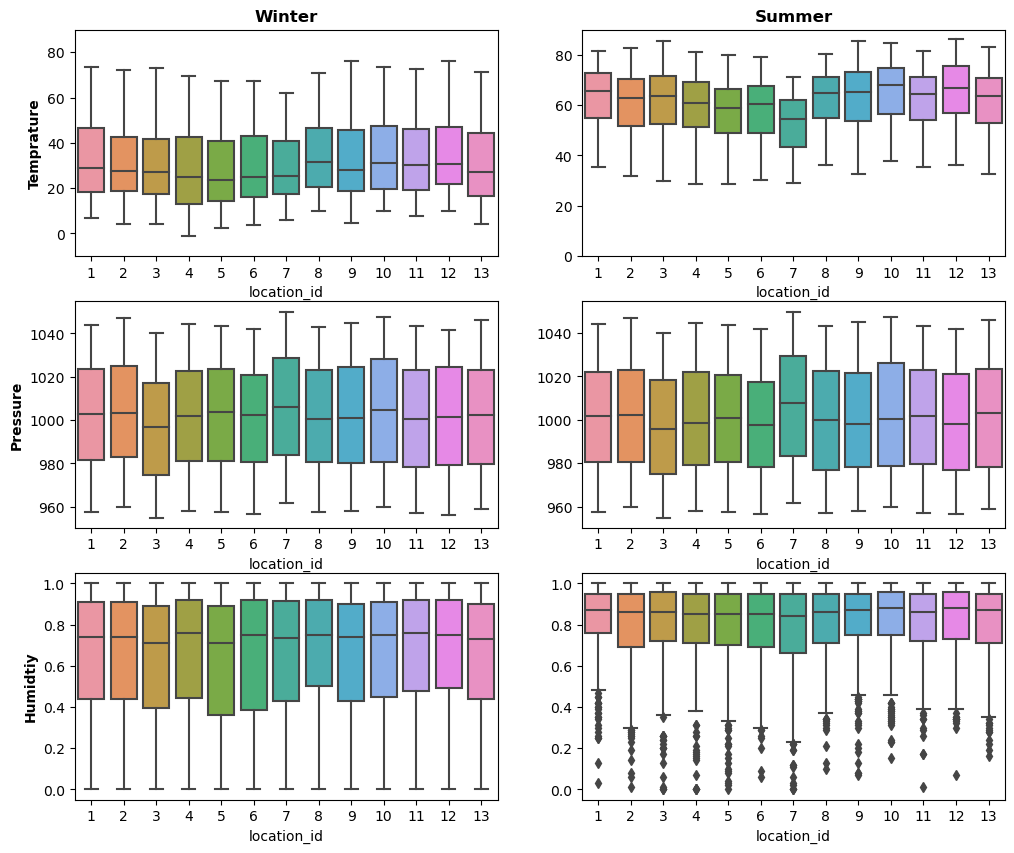

In [80]:
cols = ['Winter', 'Summer']
rows = ['Temprature', 'Pressure', 'Humidtiy']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.boxplot(winter_weather_df, x='location_id', y='temperature', ax=axes[0, 0]).set(ylabel=None)
sns.boxplot(summer_weather_df, x='location_id', y='temperature', ax=axes[0, 1]).set(ylabel=None)

sns.boxplot(winter_weather_df, x='location_id', y='pressure', ax=axes[1, 0]).set(ylabel=None)
sns.boxplot(summer_weather_df, x='location_id', y='pressure', ax=axes[1, 1]).set(ylabel=None)

sns.boxplot(winter_weather_df, x='location_id', y='humidity', ax=axes[2, 0]).set(ylabel=None)
sns.boxplot(summer_weather_df, x='location_id', y='humidity', ax=axes[2, 1]).set(ylabel=None)

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='medium', fontweight='bold')
    
axes[0, 0].set(ylim=(-10, 90))
axes[0, 1].set(ylim=(0, 90))
    
plt.savefig('./assets/weather.png', bbox_inches='tight')
    
plt.show()

In [81]:
weather_df

,location_id,date,temperature,pressure,humidity,cloudy,precipitation,season
0,3,2020-01-22,18.14,1035.058685,0.44,1,0,winter
1,8,2022-01-29,14.36,1027.253521,0.95,1,0,winter
2,5,2021-11-28,35.42,994.694836,0.37,0,0,winter
3,6,2021-10-12,37.94,1003.838028,0.11,1,1,winter
4,2,2020-12-03,23.36,1027.476526,0.60,0,0,winter
...,...,...,...,...,...,...,...,...
17273,6,2022-07-03,78.98,966.819249,0.88,1,1,summer
17274,6,2020-02-20,9.68,971.948357,0.53,0,0,winter
17275,10,2020-10-02,41.18,1013.873239,0.90,0,0,winter
17276,1,2019-12-15,15.08,990.457746,0.74,0,0,winter


For percipitaion and cloudiness we compare the ratio of the cloudy days and days with percipitation for different locaion Ids.

In [82]:
winter_perc = winter_weather_df.groupby(['location_id'])[['cloudy', 'precipitation']].agg(['mean'])
summer_perc = winter_weather_df.groupby(['location_id'])[['cloudy', 'precipitation']].agg(['mean'])

def flat_cols(df):
    '''For columns, converts from multi_index dataframe (for example from a group_by and aggregation) 
        into single index. This make plotting with seaborn easier.
        arguments:
        df: A pandas dataframe with multi_index (for example from a group_by and aggregation)
        returns: A pandas dataframe with single index for columns, and row indexes from 0 to number of 
            rows of the dataframe
    '''
    df.columns = df.columns.map('_'.join)
    return df

winter_perc = flat_cols(winter_perc).reset_index()
summer_perc = flat_cols(summer_perc).reset_index()

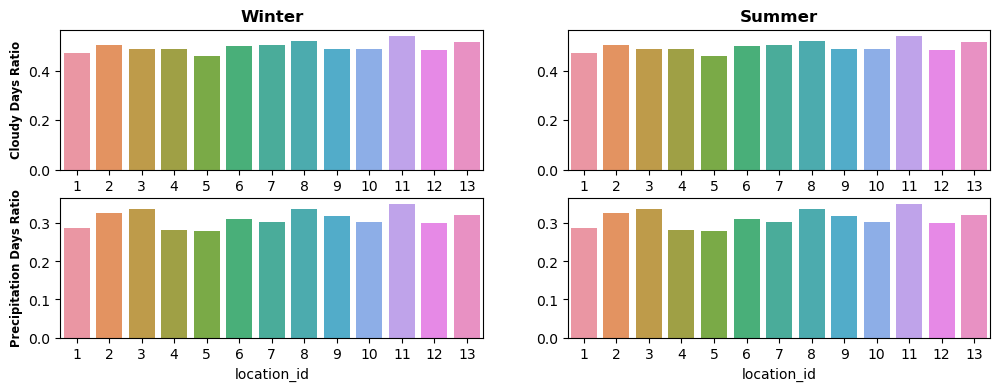

In [109]:
cols = ['Winter', 'Summer']
rows = ['Cloudy Days Ratio', 'Precipitation Days Ratio']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

sns.barplot(winter_perc, x='location_id', y='cloudy_mean', ax=axes[0, 0]).set(ylabel=None)
sns.barplot(summer_perc, x='location_id', y='cloudy_mean', ax=axes[0, 1]).set(ylabel=None)

sns.barplot(winter_perc, x='location_id', y='precipitation_mean', ax=axes[1, 0]).set(ylabel=None)
sns.barplot(summer_perc, x='location_id', y='precipitation_mean', ax=axes[1, 1]).set(ylabel=None)

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontweight='bold')

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='small', fontweight='bold')
    
plt.savefig('./assets/precipitation.png', bbox_inches='tight')

Comparing the above plots, that boldest thing is that between three target areas of 10, 11, and, 12, compared to the other two areas 13 is colder, 12 is warmer and 11 has more cloudy days and precipitation. In summers, compared to other two areas, 12 has lower pressure and higher humidity. In winters, compared to other two areas, 11 has lower pressure and 13 has lower humidity. There are a lot of other insights than one can get from comparing the above graphs. However I won't get into them for the sake of time.

As further steps one can try to look for statistical signicance of the above differrences using t-test. Another good idea is to do a clustering based on the above variables, to see if we can find meaningful weather conditions and are we able to map our location ids to these clusters. 

## Exploring Transactions Data

First let's write a funtion that load each data file into a dataframe based on the file's extention

In [84]:
def load_to_df(file_name, folder_path, text_sep="\t", dtype={'profit': str}):
    '''loads the file to a pandas dataframe.
        arguments:
        file_name: string - file_name with .extention for axample data.txt
        data_folder_path = Path obj - Path object of a folder that contains the data files
        text_sep = string - Value separetor for the text files
        dtype = dictionary - column datatypes
        return:
        a dataframe 
    '''
    # get the end part of the file's name as the extention
    exten = file_name.split('.')[-1]
    path = folder_path/file_name
    
    if exten == 'json':
        return pd.read_json(path, dtype=dtype)
    if exten == 'txt':
        return pd.read_csv(path, sep=text_sep, dtype=dtype)
    if exten == 'csv':
        return pd.read_csv(path, dtype=dtype)
    else:
        raise ValueError('File extention is not supported.')
        

In [85]:
DATA_PATH = Path('./raw-data')
# Get all the file names in the Data folder and select the ones that start with transactions 
p = re.compile(r'transactions+')
file_names = [name for name in next(iter(os.walk(DATA_PATH)))[-1] if p.match(name)]
# itterate over file_names, load them one by one and append them to a dataset called transactions_df

for i, name in enumerate(file_names):
    df = load_to_df(name, DATA_PATH)
    if i == 0:
        transactions_df = df.copy()
    else:
        transactions_df = pd.concat([transactions_df, df])

In [86]:
transactions_df.date = pd.to_datetime(transactions_df.date) 

`transaction_id` is a column that is not clearly defined. It says unique Id for transactions, but it is repeated. After doing the following analysis I found out that each day transaction Id starts from 1. 

In [87]:
# I have tested this with multiple dates
transactions_df[(transactions_df.date == '2019-01-03') & (transactions_df.location_id == 1)]

,location_id,date,transaction_id,profit
18,1,2019-01-03,1,24.45
19,1,2019-01-03,2,24.11
20,1,2019-01-03,3,26.41
21,1,2019-01-03,4,23.78
22,1,2019-01-03,5,26.05
23,1,2019-01-03,6,22.33
24,1,2019-01-03,7,22.41
25,1,2019-01-03,8,24.13
26,1,2019-01-03,9,23.92
27,1,2019-01-03,10,20.93


Now, we look for null values

In [88]:
# get the number of rows with at least one missing values
n_nulls = transactions_df.isnull().any(axis=1).sum() + transactions_df[transactions_df['profit'] == "nan"].shape[0]
print(f'Number of rows with at least one missing value: {n_nulls}')

Number of rows with at least one missing value: 27


After looking into different columns I found these two rows. Since there are only tow rows with null profit I will delete them. There are other ways to fill this value, like making a Guassian distribution with the mean and variance of that day and randomly drawing with from that probability density funtion.

In [89]:
transactions_df[(transactions_df.profit.isnull()) | (transactions_df['profit'] == "nan")]

,location_id,date,transaction_id,profit
2973,1,2020-02-07,1,nan
3031,1,2020-02-14,1,nan
2706,6,2020-02-05,1,NaN
2836,6,2020-05-28,1,NaN
4309,6,2021-02-10,1,NaN
2655,3,2020-02-10,1,NaN
2186,4,2020-02-07,1,NaN
2215,4,2020-02-14,1,NaN
2307,4,2020-05-28,1,NaN
2309,4,2020-05-30,1,NaN


In [90]:
transactions_df = transactions_df[~(
                                (transactions_df.profit.isnull()) | 
                                (transactions_df.profit == "nan"))]

Double check to make sure all the null values are removed

In [91]:
n_nulls = transactions_df.isnull().any(axis=1).sum() + transactions_df[transactions_df['profit'] == "nan"].shape[0]
print(f'Number of rows with at least one missing value: {n_nulls}')

Number of rows with at least one missing value: 0


After some trials I found out that some profit values have 0s before them and some have $s. I remove them int the following

In [92]:
transactions_df.profit = transactions_df.profit.apply(lambda profit: profit.lstrip('0'))
transactions_df.profit = transactions_df.profit.apply(lambda profit: profit.lstrip('$'))
transactions_df = transactions_df.astype({'profit': np.float16})

### Agragating profit data
Since our unit of observation for the weather data is day, we set our unit of analysis to day. To do this we aggregate the profit data to average profit of each day.

In [93]:
transactions_df_g = transactions_df.groupby(['location_id', 'date'])[['profit']].agg('mean').reset_index()

To get a full data set we merge the transactions_df with weather_df on `location_id` and `date`

In [94]:
model_data_df = transactions_df_g.merge(weather_df, how='left', on=('location_id', 'date'))

In [95]:
model_data_df

,location_id,date,profit,temperature,pressure,humidity,cloudy,precipitation,season
0,1,2019-01-02,23.940971,16.88,1034.166667,0.44,0.0,0.0,winter
1,1,2019-01-03,23.160591,17.24,1015.657277,0.58,0.0,0.0,winter
2,1,2019-01-04,23.346354,9.32,1028.145540,0.00,1.0,0.0,winter
3,1,2019-01-05,24.469669,20.12,1035.950704,0.87,1.0,0.0,winter
4,1,2019-01-06,24.247242,17.24,981.091549,0.80,0.0,0.0,winter
...,...,...,...,...,...,...,...,...,...
7610,10,2022-09-07,28.819792,65.30,1046.431925,0.93,0.0,0.0,winter
7611,10,2022-09-08,28.933035,NaN,NaN,NaN,NaN,NaN,NaN
7612,10,2022-09-09,31.148438,57.74,969.941315,0.97,1.0,1.0,winter
7613,10,2022-09-10,28.837740,61.70,972.171362,0.83,0.0,0.0,winter


In [96]:
model_data_df = model_data_df[~model_data_df.pressure.isnull()]

In [97]:
print("Number of modeling data points:", model_data_df.shape[0])

Number of modeling data points: 7225


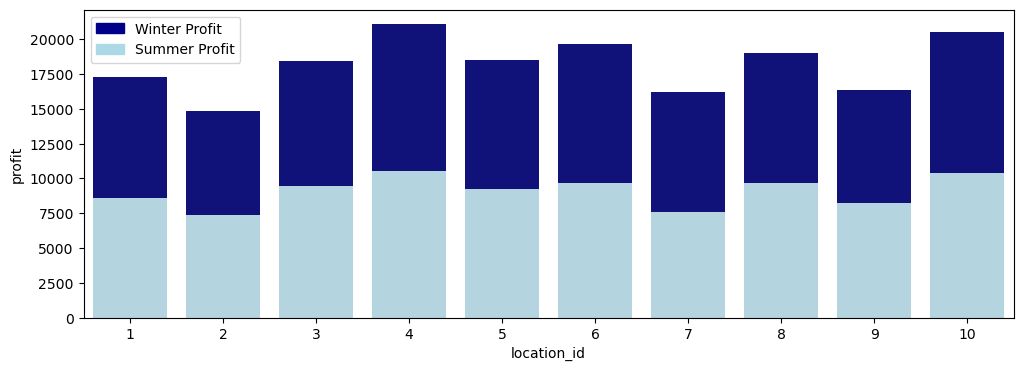

In [98]:
# set the figure size
plt.figure(figsize=(12, 4))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = model_data_df.groupby('location_id')['profit'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="location_id",  y="profit", data=total, color='darkblue')

# bottom bar ->  take only season=summer values from the data
summer = model_data_df[model_data_df.season=='summer']

# bar chart 2 -> bottom bars (group of 'season=summer')
bar2 = sns.barplot(x="location_id", y="profit", data=summer, estimator=sum, errorbar=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Winter Profit')
bottom_bar = mpatches.Patch(color='lightblue', label='Summer Profit')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

The above graph shows that 4 has the highest profit, and it is interesting to check that it has relatively cold winters (it is the only place where the weather goes to under 0), moderately warm summers, and it has the least percipitation while it has a rather good cloud coverage in summer. This makes it a proper choice for ice-tubing in winter and water tubing in summer. 

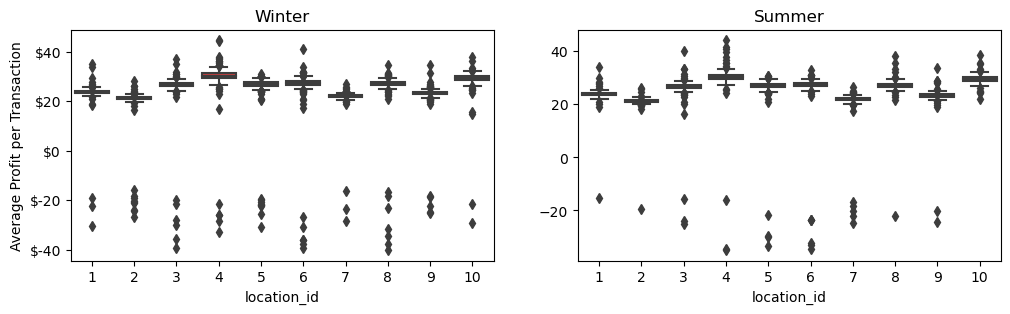

In [107]:
data_summer = model_data_df[model_data_df.season == 'summer']
data_winter = model_data_df[model_data_df.season == 'winter']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

sns.boxplot(data_winter, x='location_id', y='profit', ax=axes[0]).set(ylabel='Average Profit per Transaction', title='Winter')
sns.boxplot(data_summer, x='location_id', y='profit', ax=axes[1]).set(ylabel=None, title='Summer')

axes[0].yaxis.set_major_formatter('${x:1.0f}')

plt.savefig('./assets/daily-profits.png', bbox_inches='tight')

An interesting point in this graph is that the number of days with negative profit is much more in winter compared to summer. It may be the case that in summer people come tubing regularly since schools are closed, and days are also longer. However, in the winter poeple come to tubing only in the weekends which are the days that make the positive profit, but for rest of the days the profit is negetive.

## Building and Storing the Modeling DataSet
One way to compare different target locations is to make a dataset is to make a machine learning model that predicts the average daily profit of locations for the past days, and pick the one that yields the most profit. 

To make the final dataset I map the date variable to months, and years as seperate columns and I also map the day variable to weekend and not weekend, and holiday or not holiday and use that instead of the day itself. I will keep the months since it may show some monthly time trend, however we won't keep the year since all inference data is in 2022.

In [51]:
holidays = pd.read_csv(DATA_PATH/'holiday_data.csv')
holidays.date = pd.to_datetime(holidays.date) 
model_data_df = model_data_df.merge(holidays, how='left', on='date')

In [52]:
model_data_df[model_data_df.holiday == True]

,location_id,date,profit,temperature,pressure,humidity,cloudy,precipitation,season,holiday


So there are no holidays in our dates, and we can drop it

In [53]:
model_data_df = model_data_df.drop(columns=['holiday'])

Add the elevation and population data to the data

In [54]:
model_data_df = model_data_df.merge(locations_df, how='left', on='location_id')

Check to see if a day is a weekend

In [55]:
model_data_df['month'] = model_data_df.date.apply(lambda x: x.strftime('%m'))
# check to see if date is weeked
model_data_df['is_weekend'] = model_data_df['date'].apply(lambda x: int(x.dayofweek > 4))

In [56]:
model_data_df = model_data_df.drop(columns=['location_id', 'season', 'date'])

Next we one hot encode month variable

In [57]:
one_hot_month = pd.get_dummies(model_data_df.month, prefix='month')
model_data_df = pd.concat([model_data_df, one_hot_month], axis=1).drop(columns=['month'])
model_data_df.head()

,profit,temperature,pressure,humidity,cloudy,precipitation,population,elevation,is_weekend,month_01,month_02,month_03,month_05,month_06,month_07,month_08,month_09,month_11,month_12
0,23.940971,16.88,1034.166667,0.44,0.0,0.0,18428,375,0,1,0,0,0,0,0,0,0,0,0
1,23.160591,17.24,1015.657277,0.58,0.0,0.0,18428,375,0,1,0,0,0,0,0,0,0,0,0
2,23.346354,9.32,1028.145540,0.00,1.0,0.0,18428,375,0,1,0,0,0,0,0,0,0,0,0
3,24.469669,20.12,1035.950704,0.87,1.0,0.0,18428,375,1,1,0,0,0,0,0,0,0,0,0
4,24.247242,17.24,981.091549,0.80,0.0,0.0,18428,375,1,1,0,0,0,0,0,0,0,0,0


It can be seen above that transactions for months April and Octeber are not present in the data. This can be a bad thing since the distribution for our training and inference data are different from each other. To have all the months in our model we add zero vectors for missing months.

In [58]:
model_data_df['month_04'], model_data_df['month_10'] = 0, 0
model_data_df.head()

,profit,temperature,pressure,humidity,cloudy,precipitation,population,elevation,is_weekend,month_01,...,month_03,month_05,month_06,month_07,month_08,month_09,month_11,month_12,month_04,month_10
0,23.940971,16.88,1034.166667,0.44,0.0,0.0,18428,375,0,1,...,0,0,0,0,0,0,0,0,0,0
1,23.160591,17.24,1015.657277,0.58,0.0,0.0,18428,375,0,1,...,0,0,0,0,0,0,0,0,0,0
2,23.346354,9.32,1028.145540,0.00,1.0,0.0,18428,375,0,1,...,0,0,0,0,0,0,0,0,0,0
3,24.469669,20.12,1035.950704,0.87,1.0,0.0,18428,375,1,1,...,0,0,0,0,0,0,0,0,0,0
4,24.247242,17.24,981.091549,0.80,0.0,0.0,18428,375,1,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
model_data_df.to_csv('./preppared-data/model-data.csv', index=False)

## Buidling and Storing the Inference Dataset

In [60]:
# inference start date is 1-1-2022
infer_start = datetime.datetime(2022, 1, 1)
# inference end data is the most recent date that we have data for
infer_end = weather_df.date.max()

print(f"Most recent date is: {infer_end}")

Most recent date is: 2022-10-30 00:00:00


In [61]:
infer_df = weather_df[(weather_df.date >= infer_start) & (weather_df.date <= infer_end)].copy()

In [62]:
infer_df['month'] = infer_df.date.apply(lambda x: x.strftime('%m'))
# check to see if date is weeked
infer_df['is_weekend'] = infer_df['date'].apply(lambda x: int(x.dayofweek > 4))

For inference data we should filter location Ids 11, 12, 13. We also drop the extra columns.

In [63]:
infer_df = infer_df[infer_df.location_id > 10]

In [64]:
infer_df = infer_df.merge(locations_df, how='left', on='location_id')

Since these businesses are closed on holiday, we remove the holidays from inference data as well.

In [65]:
infer_df = infer_df[~(infer_df.date.isin(holidays.date))]

In [66]:
infer_df.head()

,location_id,date,temperature,pressure,humidity,cloudy,precipitation,season,month,is_weekend,population,elevation
0,13,2022-06-27,77.54,987.112676,0.97,0,0,summer,06,0,68818,310
1,12,2022-04-29,47.12,979.084507,0.99,0,0,summer,04,0,196528,436
2,11,2022-09-08,65.84,991.126761,0.80,1,0,winter,09,0,121465,398
3,13,2022-09-12,56.48,1008.967136,0.57,0,0,winter,09,0,68818,310
4,12,2022-04-18,50.00,1040.856808,0.88,0,0,summer,04,0,196528,436


One hot encoding month

In [67]:
one_hot_month = pd.get_dummies(infer_df.month, prefix='month')
infer_df = pd.concat([infer_df, one_hot_month], axis=1).drop(columns=['month'])
infer_df.head()

,location_id,date,temperature,pressure,humidity,cloudy,precipitation,season,is_weekend,population,...,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10
0,13,2022-06-27,77.54,987.112676,0.97,0,0,summer,0,68818,...,0,0,0,0,0,1,0,0,0,0
1,12,2022-04-29,47.12,979.084507,0.99,0,0,summer,0,196528,...,0,0,0,1,0,0,0,0,0,0
2,11,2022-09-08,65.84,991.126761,0.80,1,0,winter,0,121465,...,0,0,0,0,0,0,0,0,1,0
3,13,2022-09-12,56.48,1008.967136,0.57,0,0,winter,0,68818,...,0,0,0,0,0,0,0,0,1,0
4,12,2022-04-18,50.00,1040.856808,0.88,0,0,summer,0,196528,...,0,0,0,1,0,0,0,0,0,0


Adding months Nov and Dec az 0s to inference data

In [68]:
infer_df['month_11'], infer_df['month_12'] = 0, 0
infer_df.head()

,location_id,date,temperature,pressure,humidity,cloudy,precipitation,season,is_weekend,population,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,13,2022-06-27,77.54,987.112676,0.97,0,0,summer,0,68818,...,0,0,0,1,0,0,0,0,0,0
1,12,2022-04-29,47.12,979.084507,0.99,0,0,summer,0,196528,...,0,1,0,0,0,0,0,0,0,0
2,11,2022-09-08,65.84,991.126761,0.80,1,0,winter,0,121465,...,0,0,0,0,0,0,1,0,0,0
3,13,2022-09-12,56.48,1008.967136,0.57,0,0,winter,0,68818,...,0,0,0,0,0,0,1,0,0,0
4,12,2022-04-18,50.00,1040.856808,0.88,0,0,summer,0,196528,...,0,1,0,0,0,0,0,0,0,0


In [69]:
infer_df.to_csv('./preppared-data/infer-data.csv', index=False)